# HR Analytics Project- Understanding the Attrition in HR

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In the above dataset there are 1470 rows and 35 columns . attrition is the output column and rest are input columns

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

from the above we can see that it is a mix dataset of catagorical and numerical columns,
OverTime ,Over18 , MaritalStatus,JobRole ,Gender,EducationField,Department,BusinessTravel,Attrition are the catagoricalcolumns and rest are numerical columns.

<AxesSubplot:>

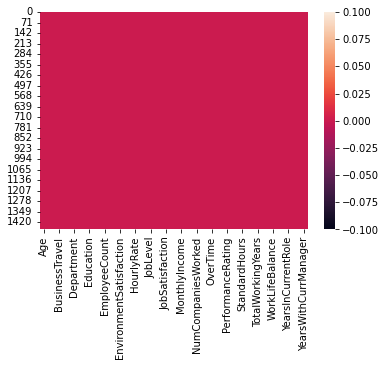

In [5]:
sns.heatmap(df.isnull())

here we can see that there is no missing values is the data set

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


from the statistical description we can see that not much differences are there in between 75% and max values and in between mean and 50% except some columns like YearsSinceLastPromotion,YearsWithCurrManager . So there is a less chance of having much skewness in the most of the data but still if can find some skew ness we will remove that .

In [7]:
df_obj=df.describe(include ="object")
df_obj

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


here we can see the no of unique values with top values with  their frequencies 

In [8]:
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

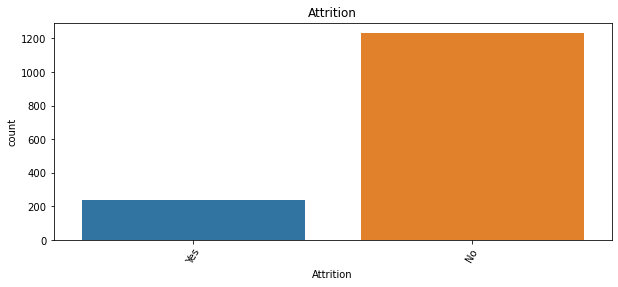

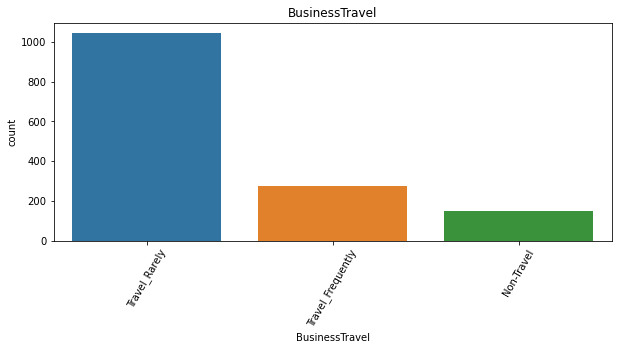

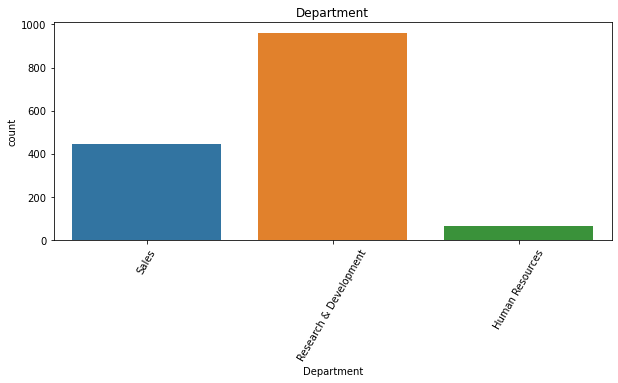

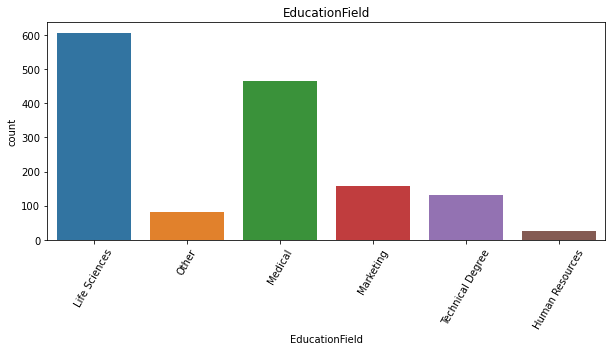

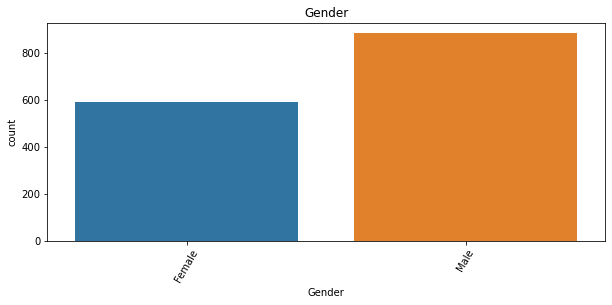

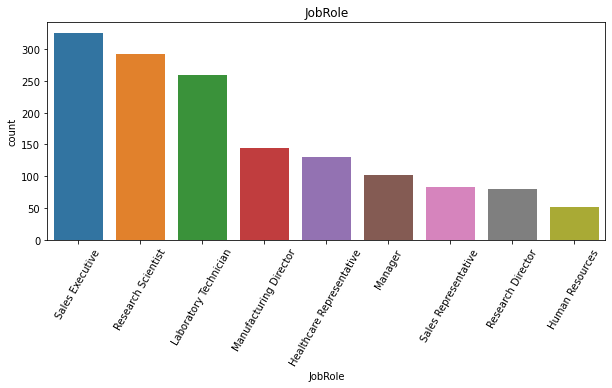

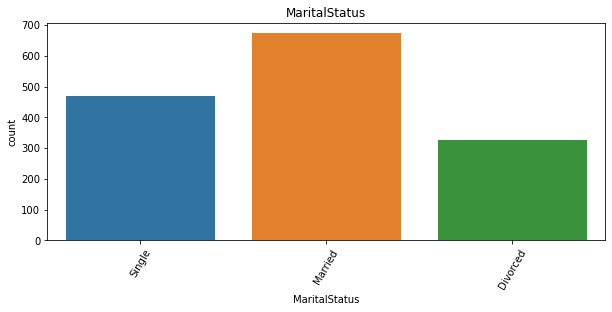

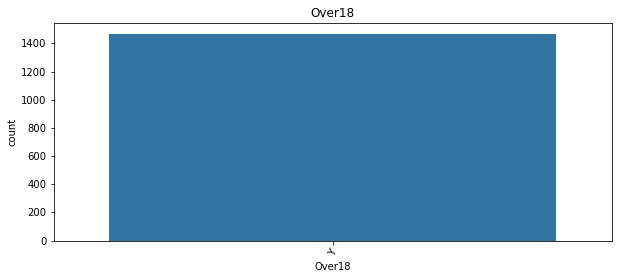

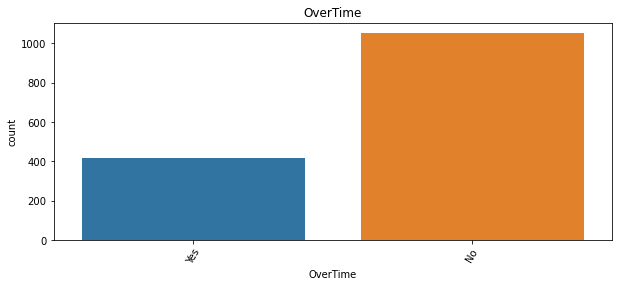

In [10]:
for col in obj_columns.columns:
    plt.figure(figsize=(10,4))
    plt.subplot()
    sns.countplot(obj_columns[col])
    plt.title(col)
    plt.xticks(rotation=60)
    plt.show()

here we can see the count plot of each columns , we can clearly see that data set is imbalanced. so balancing of the dataset is needed.

columns : attrition , business travel,department,eduField,gender,jobrole,maritarialst,overtime


maxvalue:  no       ,travel ready ,research&dev ,lscience,male ,sales ,married,        no

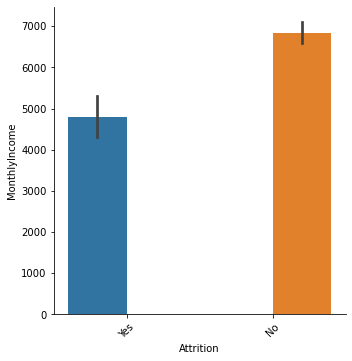

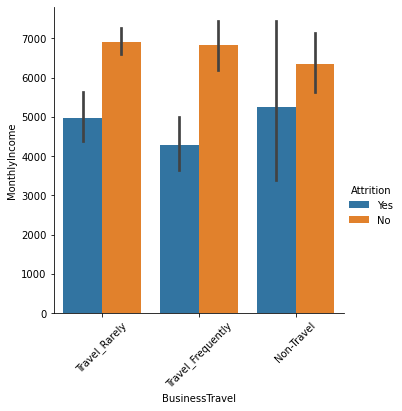

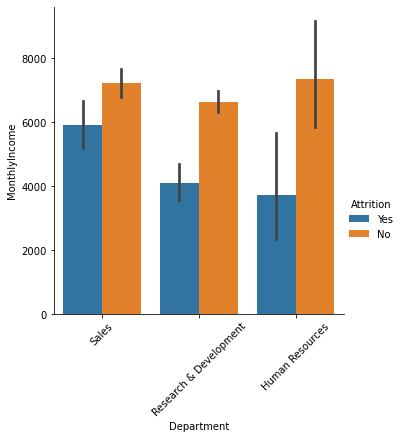

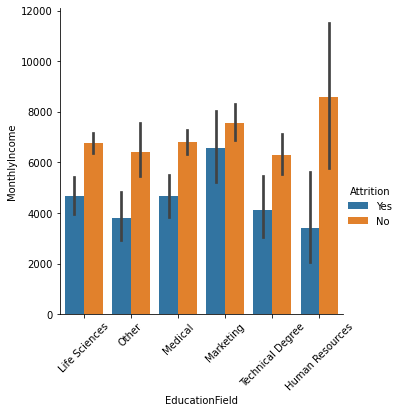

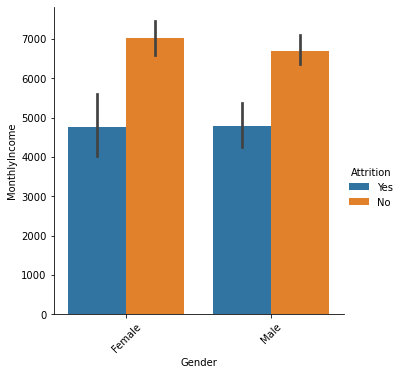

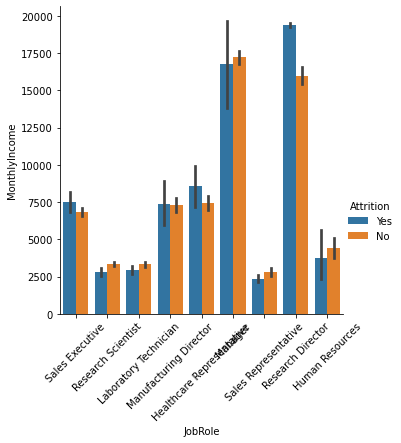

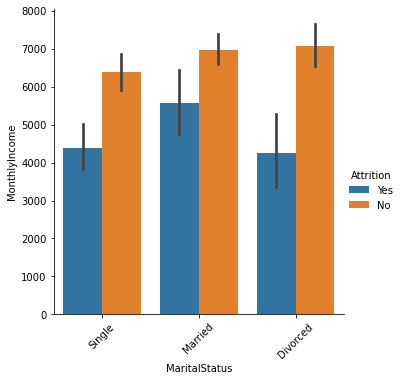

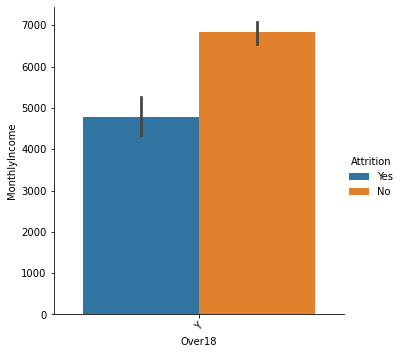

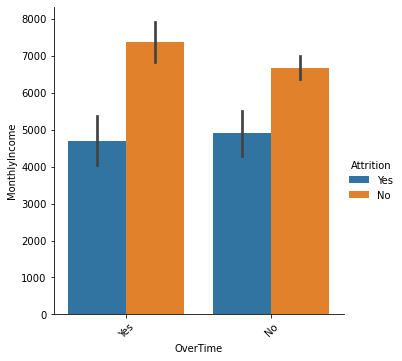

In [11]:
for col in obj_columns.columns:
    sns.catplot(x=col,y='MonthlyIncome',hue="Attrition",data=df,kind="bar")
    plt.xticks(rotation=45)

here we have done bivariate analysis.

in the business travel column job rarely is the highest value wint no attrition but positive attrition is more in non travel.

in department column sales is the higest value with max no attrition.

humanresources is the department where maximum no of attrition has occured

in educational field also maximum no of attrition has occured in HR field.

maximum no of attrition has occured in case of female gender although no of male candidate is maximun in comparison to female candidate .

in case of job role maximum no of attrition has occured in sales representative jr. and minimum is health care representative job role.

in case of married people max no of attrition has occured.

maximum no of attrition has occured in case of no overtime workers


In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='YearsAtCompany'>

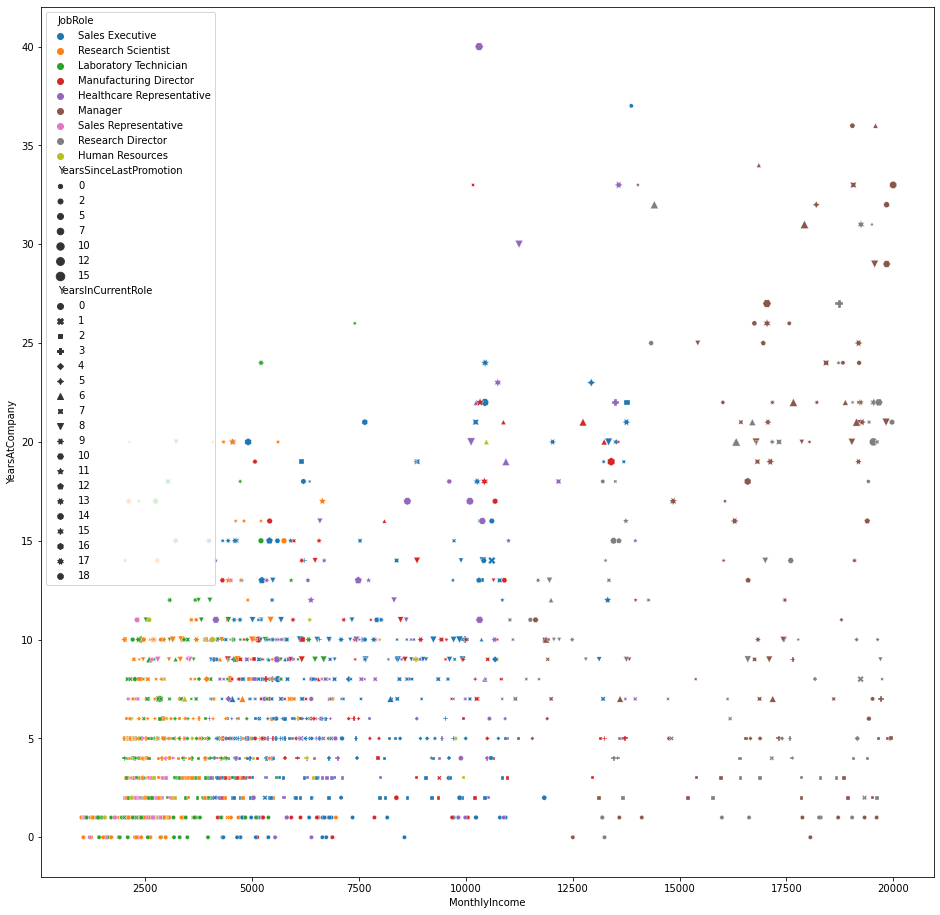

In [13]:
plt.figure(figsize=(16,16))
sns.scatterplot(x=df["MonthlyIncome"],y=df["YearsAtCompany"],hue=df["JobRole"],style=df["YearsInCurrentRole"],size=df["YearsSinceLastPromotion"])

here we can see that there is a positive relation between monthly income and no of maximum years in the company and that is quite natural

in case og manager job role no of years since last promotion and no of years in the current job role is higher in comparison to other job role 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

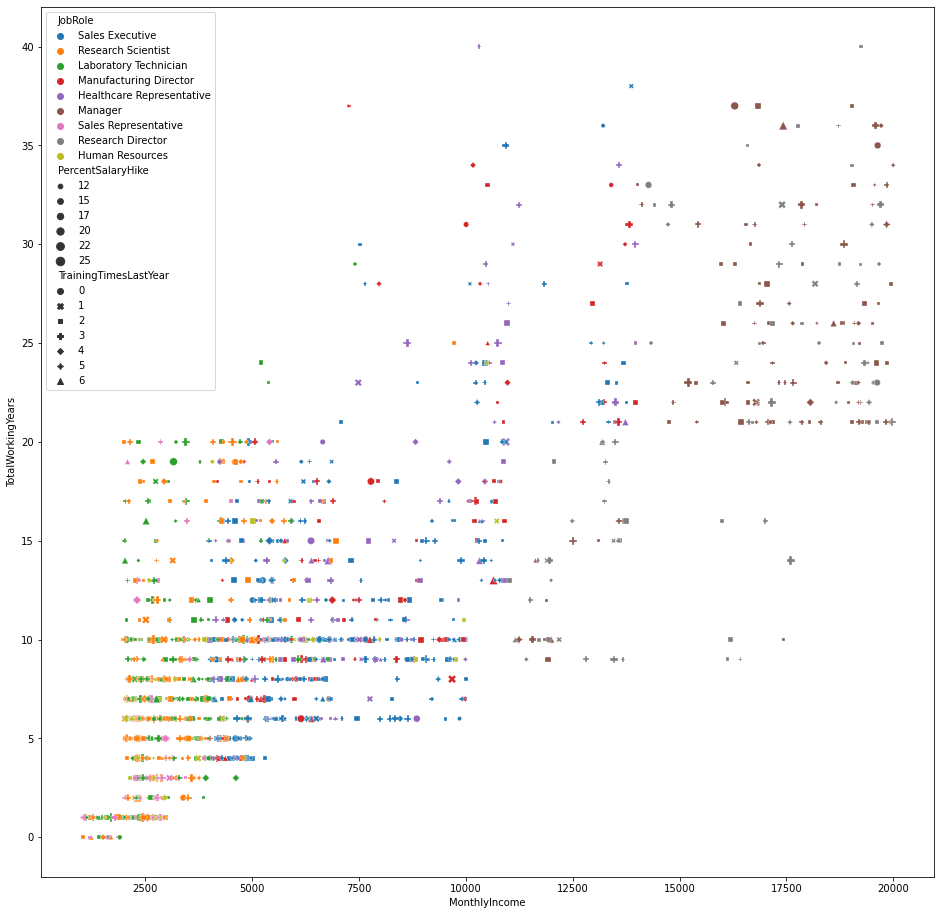

In [14]:
plt.figure(figsize=(16,16))
sns.scatterplot(x=df["MonthlyIncome"],y=df["TotalWorkingYears"],hue=df["JobRole"],style=df["TrainingTimesLastYear"],size=df["PercentSalaryHike"])

It is alsoa multivariate analysis . here we can see that there is a positive relation between monthly income and total working years in the company and that is quite natural .

no of training times is higher with high salary hikes and that is also maximum in case of manager job role.

for human resource and labortary technician monthly income is comparatively low but with high salary hike and training times is medium to high in the last year.

In [15]:
df["PercentSalaryHike"].value_counts().sort_values(ascending=False)

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='MonthlyIncome'>

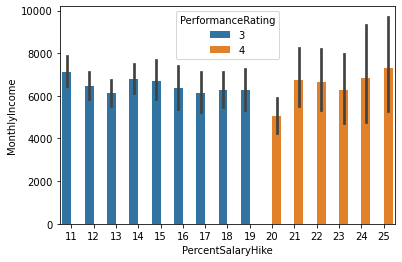

In [16]:
sns.barplot(x=df["PercentSalaryHike"],y=df["MonthlyIncome"],hue=df["PerformanceRating"])

here we can see that percentage salary hike is also high with higher performance rating even with low mothly income in some cases 

<AxesSubplot:xlabel='JobSatisfaction', ylabel='JobLevel'>

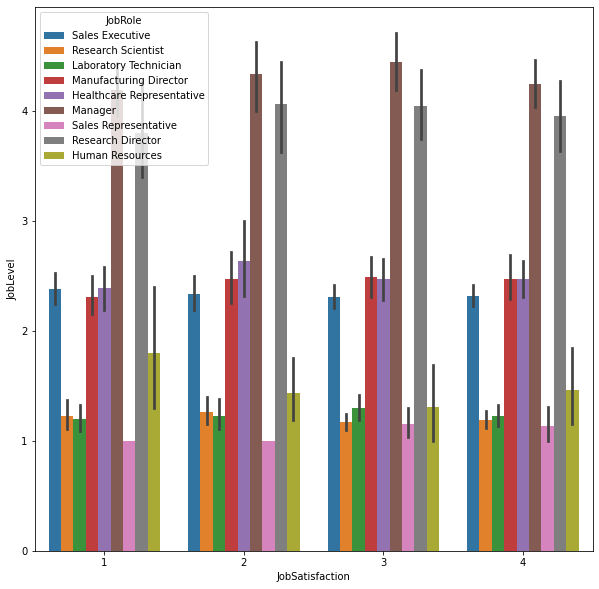

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(x=df["JobSatisfaction"],y=df["JobLevel"],hue=df["JobRole"])

here we can see that HR and labortary technician job lebel is low in comparison to manager and research director

<AxesSubplot:ylabel='JobSatisfaction'>

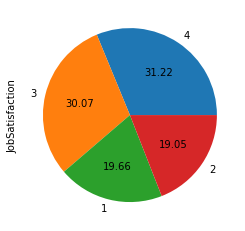

In [18]:
(df["JobSatisfaction"].value_counts()).plot(kind="pie",autopct="%.2f")

<AxesSubplot:ylabel='JobLevel'>

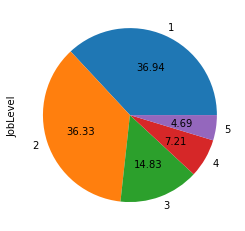

In [19]:
(df["JobLevel"].value_counts()).plot(kind="pie",autopct="%.2f")

<AxesSubplot:ylabel='JobInvolvement'>

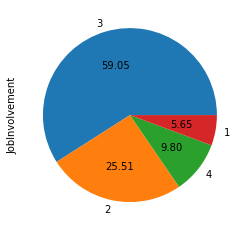

In [20]:
(df["JobInvolvement"].value_counts()).plot(kind="pie",autopct="%.2f")

from these pieplots we can see various percentage JobInvolvement,EmployeeCount,EnvironmentSatisfaction,JobLevel,JobSatisfaction.

In [21]:
df["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

<AxesSubplot:ylabel='EnvironmentSatisfaction'>

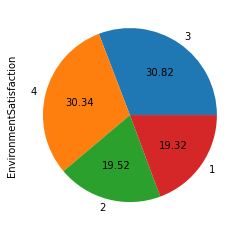

In [22]:
(df["EnvironmentSatisfaction"].value_counts()).plot(kind="pie",autopct="%.2f")

In [23]:
df["Education"].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

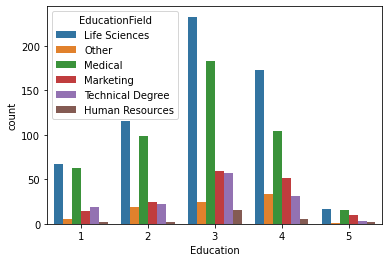

In [24]:
sns.countplot(df["Education"],hue=df["EducationField"])

here we can see that life science and medical educational field is higher in comparison to other educational fields and minimum is HR field.

In [25]:
df.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
Age                         0.413286
MonthlyRate                 0.018578
EmployeeNumber              0.016574
StandardHours               0.000000
EmployeeCount               0.000000
DailyRate                  -0.003519
HourlyRate                 -0.032311
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobInvolvement             -0.498419
WorkLifeBalance            -0.552480
dtype: float64

here we can see that not much skewness is present in the dataset.

In [45]:
df_new=df.drop(columns=["Department","EmployeeNumber","StockOptionLevel","DistanceFromHome","EmployeeNumber","StandardHours","EmployeeCount","Over18"],axis=1)

"Department","EmployeeNumber","StockOptionLevel","DistanceFromHome","EmployeeNumber","StandardHours","EmployeeCount","Over18" .... these are some less important collumns so we are dropping these columns

In [46]:
df_new

,Age,Attrition,BusinessTravel,DailyRate,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,2,Life Sciences,2,Female,94,3,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,1,Life Sciences,3,Male,61,2,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,2,Other,4,Male,92,2,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,4,Life Sciences,4,Female,56,3,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,1,Medical,1,Male,40,3,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,2,Medical,3,Male,41,4,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,1,Medical,4,Male,42,2,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,3,Life Sciences,2,Male,87,4,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,3,Medical,4,Male,63,2,...,14,3,4,17,3,2,9,6,0,8


In [47]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [48]:
for i in df_new.columns:
    if df_new[i].dtypes=="object":
        df_new[i]= oe.fit_transform(df_new[i].values.reshape(-1,1))

here we have used ordinal encoding technique to encode catagorical features.

In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Education                 1470 non-null   int64  
 5   EducationField            1470 non-null   float64
 6   EnvironmentSatisfaction   1470 non-null   int64  
 7   Gender                    1470 non-null   float64
 8   HourlyRate                1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobRole                   1470 non-null   float64
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1470 non-null   float64
 14  MonthlyI

In [50]:
df_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2,1.0,2,0.0,94,3,...,11,3,1,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1,1.0,3,1.0,61,2,...,23,4,4,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,2,4.0,4,1.0,92,2,...,15,3,2,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,4,1.0,4,0.0,56,3,...,11,3,3,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1,3.0,1,1.0,40,3,...,12,3,4,6,3,3,2,2,2,2


In [83]:
x=df_new.drop(["Attrition"],axis=1)
y=df_new["Attrition"]
print(x.shape)
print(y.shape)

(1470, 27)
(1470,)


here we have done splitting of the data 

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xc=sc.fit_transform(x)
xc=pd.DataFrame(xc)
xc.columns=x.columns
xc

,Age,BusinessTravel,DailyRate,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,0.379672,-0.057788,...,-1.150554,-0.426230,-1.584178,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-1.868426,-0.937414,0.254625,0.816497,-0.240677,-1.026167,-0.057788,...,2.129306,2.346151,1.191438,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.891688,1.316673,1.169781,0.816497,1.284725,-1.026167,-0.961486,...,-0.057267,-0.426230,-0.658973,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,1.061787,-0.937414,1.169781,-1.224745,-0.486709,0.379672,-0.961486,...,-1.150554,-0.426230,0.266233,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-1.868426,0.565311,-1.575686,0.816497,-1.274014,0.379672,-0.961486,...,-0.877232,-0.426230,1.191438,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.891688,0.565311,0.254625,0.816497,-1.224807,1.785511,-0.057788,...,0.489376,-0.426230,0.266233,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,0.590048,-0.469754,-1.868426,0.565311,1.169781,0.816497,-1.175601,-1.026167,0.845911,...,-0.057267,-0.426230,-1.584178,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,0.590048,-1.605183,0.085049,-0.937414,-0.660531,0.816497,1.038693,1.785511,-0.057788,...,1.309341,2.346151,-0.658973,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.913194,0.546677,0.085049,0.565311,1.169781,0.816497,-0.142264,-1.026167,-0.057788,...,-0.330589,-0.426230,1.191438,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


<AxesSubplot:>

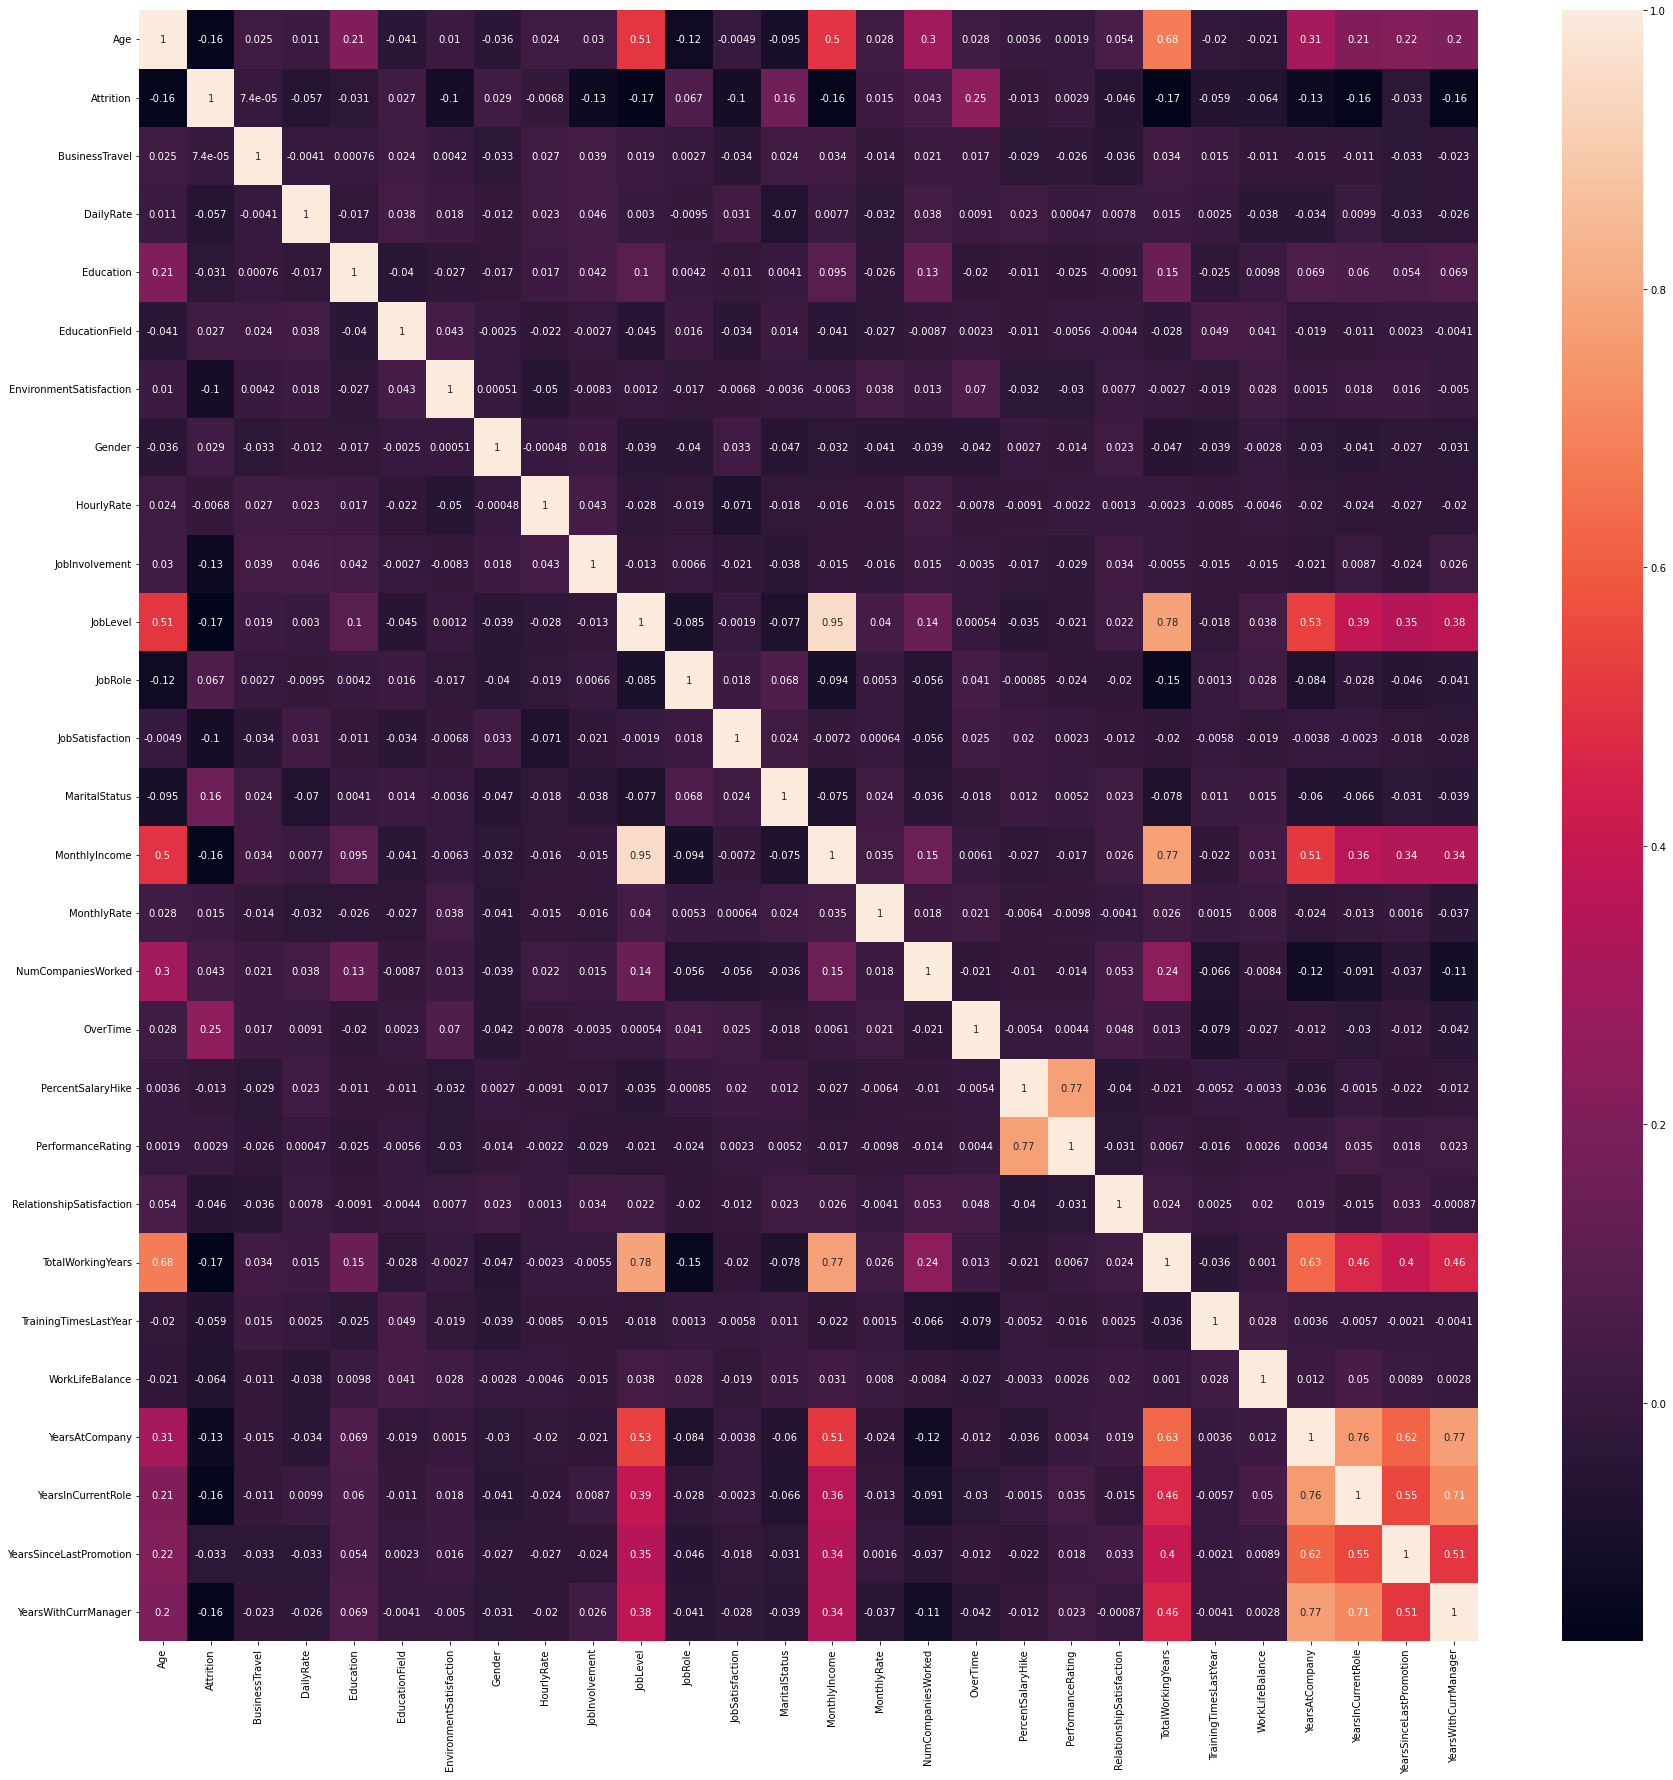

In [53]:
plt.figure(figsize=(30,30))
sns.heatmap(df_new.corr(),annot=True)

here we can see the corelation between various features,'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager' these columns are highly corelated with each other .

In [54]:
y.value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

here we can see the imbalancing of the data set so balancing is required. we are using smote method to balance the dataset.

In [55]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
xtrainw,ytrainw=smote.fit_resample(xc,y)


In [56]:
ytrainw.value_counts()

1.0    1233
0.0    1233
Name: Attrition, dtype: int64

now the dataset is balanced and we are using various classification models to classify the data . 

In [61]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [62]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lrpred=lr.predict(x_test)
    acc=accuracy_score(y_test,lrpred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.8238866396761133 on random state 85


In [63]:
score=cross_val_score(lr,xtrainw,ytrainw,cv=5)
score.mean()

0.7842696536942293

In [64]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.9048582995951417 on random state 94


In [65]:
score=cross_val_score(dtc,xtrainw,ytrainw,cv=5)
score.mean()

0.8601465045043566

In [66]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    dtce=DecisionTreeClassifier(criterion="entropy")
    dtce.fit(x_train,y_train)
    preddt=dtce.predict(x_test)
    acc=accuracy_score(y_test,preddt)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.9048582995951417 on random state 183


In [67]:
score=cross_val_score(dtce,xtrainw,ytrainw,cv=5)
score.mean()

0.8658317661840668

In [68]:
maxacc=0
maxrs=0
from sklearn.ensemble import RandomForestClassifier
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    rfc=RandomForestClassifier(n_estimators=200)
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    acc=accuracy_score(y_test,predrfc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.9696356275303644 on random state 189


In [69]:
score=cross_val_score(rfc,xtrainw,ytrainw,cv=5)
score.mean()

0.9359954340524428

In [70]:
maxacc=0
maxrs=0
from sklearn.ensemble import AdaBoostClassifier
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    adc=AdaBoostClassifier()
    adc.fit(x_train,y_train)
    predadc=adc.predict(x_test)
    acc=accuracy_score(y_test,predadc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.9331983805668016 on random state 53


In [71]:
score=cross_val_score(adc,xtrainw,ytrainw,cv=5)
score.mean()

0.8699304432089742

In [72]:
maxacc=0
maxrs=0
from sklearn.svm import SVC
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    acc=accuracy_score(y_test,predsvc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.937246963562753 on random state 98


In [73]:
score=cross_val_score(svc,xtrainw,ytrainw,cv=5)
score.mean()

0.9047154084305786

In [74]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_features":["auto","sqrt","log2"],"max_depth":[0,1,2,3,4,5,6,7,8],"criterion":["gini","entropy"]}
gscv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")

In [75]:
gscv.fit(xtrainw,ytrainw)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [76]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [77]:
gscv.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [78]:
gscvpred=gscv.best_estimator_.predict(x_test)

In [80]:
print(accuracy_score(y_test,gscvpred))
print(confusion_matrix(y_test,gscvpred))
print(classification_report(y_test,gscvpred))

0.9757085020242915
[[242   4]
 [  8 240]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       246
         1.0       0.98      0.97      0.98       248

    accuracy                           0.98       494
   macro avg       0.98      0.98      0.98       494
weighted avg       0.98      0.98      0.98       494



among various models random forest classifier has given thebest result and we have applied grid search cv for best estimator , accuracy score is 98%.

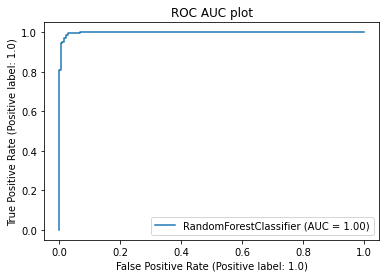

In [84]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

here we have plotted auc roc curve and we can see the  auc score is 100 

In [81]:
import joblib

In [82]:
joblib.dump(gscv.best_estimator_,"hr_attrition.pkl")

['hr_attrition.pkl']